### Running API for getting data set

In [8]:
# making parameters
# Currency and Time Frame
params = {
    "count": 5000,
    "granularity": 'H1'
}

In [9]:
# Calling the API
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import oandapyV20
import oandapyV20.endpoints.instruments as instruments
client = oandapyV20.API(access_token="3e0f7f10c6e7badcfabbf14ec0ea6e0f-f46e39153b94a3659e539e630ae9112a")

r = instruments.InstrumentsCandles(instrument="EUR_USD", params=params)
db = client.request(r)
#print(r.response)


In [10]:
data_mid = pd.DataFrame(columns=('Time','Open','High','Low','Close','Vol'))

item={}

for i in range(len(db['candles'])):
    item={}
    item['Time']=db['candles'][i]['time']
    item['Open']=db['candles'][i]['mid']['o']
    item['High']=db['candles'][i]['mid']['h']
    item['Low']=db['candles'][i]['mid']['l']
    item['Close']=db['candles'][i]['mid']['c']
    item['Vol']=db['candles'][i]['volume']
    data_mid.loc[len(data_mid)]=item

In [21]:
data_mid['Date'] = pd.to_datetime(data_mid.Time)
data = data_mid.copy()
data.set_index('Date', inplace=True)
data['Open']=data.Open.astype(float)
data['High']=data.High.astype(float)
data['Low']=data.Low.astype(float)
data['Close']=data.Close.astype(float)
data['Vol']=data.Vol.astype(float)
data['Dev']=data.High-data.Low
data['M20']=data.Close.rolling(20).mean()

In [22]:
data.head()

,Time,Open,High,Low,Close,Vol,Dev,M20
Date,,,,,,,,
2019-07-12 05:00:00+00:00,2019-07-12T05:00:00.000000000Z,1.12710,1.12750,1.12701,1.12731,215.0,0.00049,NaN
2019-07-12 06:00:00+00:00,2019-07-12T06:00:00.000000000Z,1.12734,1.12735,1.12668,1.12722,576.0,0.00067,NaN
2019-07-12 07:00:00+00:00,2019-07-12T07:00:00.000000000Z,1.12724,1.12748,1.12619,1.12648,872.0,0.00129,NaN
2019-07-12 08:00:00+00:00,2019-07-12T08:00:00.000000000Z,1.12651,1.12700,1.12614,1.12622,786.0,0.00086,NaN
2019-07-12 09:00:00+00:00,2019-07-12T09:00:00.000000000Z,1.12624,1.12670,1.12546,1.12568,1090.0,0.00124,NaN


In [20]:
#data.to_excel('EURUSE1H_20200501.xlsx')

#### Making function
H_Periods: number of hours for making hurdle   
H_Bars : number of hurdles. Default = 10

In [66]:
def test(i, start, end, days):
    df=data.copy()
    H_Period = i
    H_Bars = 10
    df['Highest'] = df.High.rolling(H_Period).max()
    df['Lowest'] = df.Low.rolling(H_Period).min()
    df['Total_Vol'] = df.Vol.rolling(H_Period).sum()
    df['Price_Level'] = (df.Highest-df.Lowest)/H_Bars
    
    df['One_L']=df.Lowest
    df['One_H']=df.One_L+df.Price_Level
    df['One_V']=0
    df['One_R']=0
    df['One_T']=0
    df['Two_L']=df.One_H
    df['Two_H']=df.Two_L+df.Price_Level
    df['Two_V']=0
    df['Two_R']=0
    df['Two_T']=0
    df['Three_L']=df.Two_H
    df['Three_H']=df.Three_L+df.Price_Level
    df['Three_V']=0
    df['Three_R']=0
    df['Three_T']=0
    df['Four_L']=df.Three_H
    df['Four_H']=df.Four_L+df.Price_Level
    df['Four_V']=0
    df['Four_R']=0
    df['Four_T']=0
    df['Five_L']=df.Four_H
    df['Five_H']=df.Five_L+df.Price_Level
    df['Five_V']=0
    df['Five_R']=0
    df['Five_T']=0
    df['Six_L']=df.Five_H
    df['Six_H']=df.Six_L+df.Price_Level
    df['Six_V']=0
    df['Six_R']=0
    df['Six_T']=0
    df['Seven_L']=df.Six_H
    df['Seven_H']=df.Seven_L+df.Price_Level
    df['Seven_V']=0
    df['Seven_R']=0
    df['Seven_T']=0
    df['Eight_L']=df.Seven_H
    df['Eight_H']=df.Eight_L+df.Price_Level
    df['Eight_V']=0
    df['Eight_R']=0
    df['Eight_T']=0
    df['Nine_L']=df.Eight_H
    df['Nine_H']=df.Nine_L+df.Price_Level
    df['Nine_V']=0
    df['Nine_R']=0
    df['Nine_T']=0
    df['Ten_L']=df.Nine_H
    df['Ten_H']=df.Ten_L+df.Price_Level
    df['Ten_V']=0
    df['Ten_R']=0
    df['Ten_T']=0
    
    df.One_V.loc[(df.Close > df.One_L)&(df.Close <= df.One_H)] = df.Vol
    df.Two_V.loc[(df.Close > df.Two_L)&(df.Close <= df.Two_H)] = df.Vol
    df.Three_V.loc[(df.Close > df.Three_L)&(df.Close <=df.Three_H)] = df.Vol
    df.Four_V.loc[(df.Close > df.Four_L)&(df.Close <= df.Four_H)] = df.Vol
    df.Five_V.loc[(df.Close > df.Five_L)&(df.Close <= df.Five_H)] = df.Vol
    df.Six_V.loc[(df.Close > df.Six_L)&(df.Close <= df.Six_H)] = df.Vol
    df.Seven_V.loc[(df.Close > df.Seven_L)&(df.Close <= df.Seven_H)] = df.Vol
    df.Eight_V.loc[(df.Close > df.Eight_L)&(df.Close <= df.Eight_H)] = df.Vol
    df.Nine_V.loc[(df.Close > df.Nine_L)&(df.Close <= df.Nine_H)] = df.Vol
    df.Ten_V.loc[(df.Close > df.Ten_L)&(df.Close <= df.Ten_H)] = df.Vol    
    
    df.One_T= df.One_V.rolling(H_Period).sum()
    df.Two_T= df.Two_V.rolling(H_Period).sum()
    df.Three_T= df.Three_V.rolling(H_Period).sum()
    df.Four_T= df.Four_V.rolling(H_Period).sum()
    df.Five_T= df.Five_V.rolling(H_Period).sum()
    df.Six_T= df.Six_V.rolling(H_Period).sum()
    df.Seven_T= df.Seven_V.rolling(H_Period).sum()
    df.Eight_T= df.Eight_V.rolling(H_Period).sum()
    df.Nine_T= df.Nine_V.rolling(H_Period).sum()
    df.Ten_T= df.Ten_V.rolling(H_Period).sum()
    df.One_R= (df.One_T/df.Total_Vol)*100
    df.Two_R= (df.Two_T/df.Total_Vol)*100
    df.Three_R= (df.Three_T/df.Total_Vol)*100
    df.Four_R= (df.Four_T/df.Total_Vol)*100
    df.Five_R= (df.Five_T/df.Total_Vol)*100
    df.Six_R= (df.Six_T/df.Total_Vol)*100
    df.Seven_R= (df.Seven_T/df.Total_Vol)*100
    df.Eight_R= (df.Eight_T/df.Total_Vol)*100
    df.Nine_R= (df.Nine_T/df.Total_Vol)*100
    df.Ten_R= (df.Ten_T/df.Total_Vol)*100
    
    test = df.copy()
    test = test.fillna(0)
    
    s = test.filter(like='_R').idxmax(1).str.replace('_R','_L')
    test['Show_L'] = test.lookup(s.index,s)
    s = test.filter(like='_R').idxmax(1).str.replace('_R','_H')
    test['Show_H'] = test.lookup(s.index,s)
    
    recent_5 = test.iloc[-10,0]
    print(test.loc[recent_5:,['Close','Show_L','Show_H']])
   
    plt.figure(figsize=(25,10))
    drawing = test.loc[start:end,['Close','Show_L','Show_H']]
    plt.plot(drawing.index, drawing[['Close','Show_L','Show_H']])
    return
    

In [48]:
i = 400
end = data_mid.iloc[-1,-1]
start = data_mid.iloc[-1000,-1]
print(start,end)

2020-02-19 03:00:00+00:00 2020-04-16 17:00:00+00:00


In [49]:
data.tail(5)

,Time,Open,High,Low,Close,Vol,Dev,M20
Date,,,,,,,,
2020-04-16 13:00:00+00:00,2020-04-16T13:00:00.000000000Z,1.08894,1.08948,1.08720,1.08788,7946.0,0.00228,1.088941
2020-04-16 14:00:00+00:00,2020-04-16T14:00:00.000000000Z,1.08787,1.08888,1.08472,1.08508,9617.0,0.00416,1.088586
2020-04-16 15:00:00+00:00,2020-04-16T15:00:00.000000000Z,1.08510,1.08532,1.08282,1.08408,7618.0,0.00250,1.088222
2020-04-16 16:00:00+00:00,2020-04-16T16:00:00.000000000Z,1.08408,1.08498,1.08168,1.08336,6541.0,0.00330,1.087835
2020-04-16 17:00:00+00:00,2020-04-16T17:00:00.000000000Z,1.08334,1.08478,1.08317,1.08452,3013.0,0.00161,1.087518


                             Close    Show_L    Show_H
Date                                                  
2020-04-16 08:00:00+00:00  1.08878  1.090664  1.094680
2020-04-16 09:00:00+00:00  1.08688  1.090664  1.094680
2020-04-16 10:00:00+00:00  1.08796  1.090664  1.094680
2020-04-16 11:00:00+00:00  1.08820  1.091534  1.095405
2020-04-16 12:00:00+00:00  1.08895  1.091534  1.095405
2020-04-16 13:00:00+00:00  1.08788  1.091534  1.095405
2020-04-16 14:00:00+00:00  1.08508  1.091534  1.095405
2020-04-16 15:00:00+00:00  1.08408  1.091534  1.095405
2020-04-16 16:00:00+00:00  1.08336  1.092008  1.095800
2020-04-16 17:00:00+00:00  1.08452  1.092008  1.095800
                                                     Time     Open     High  \
Date                                                                          
2020-01-21 07:00:00+00:00  2020-01-21T07:00:00.000000000Z  1.10941  1.10969   
2020-01-21 08:00:00+00:00  2020-01-21T08:00:00.000000000Z  1.10924  1.10963   
2020-01-21 09:00:00+00:0

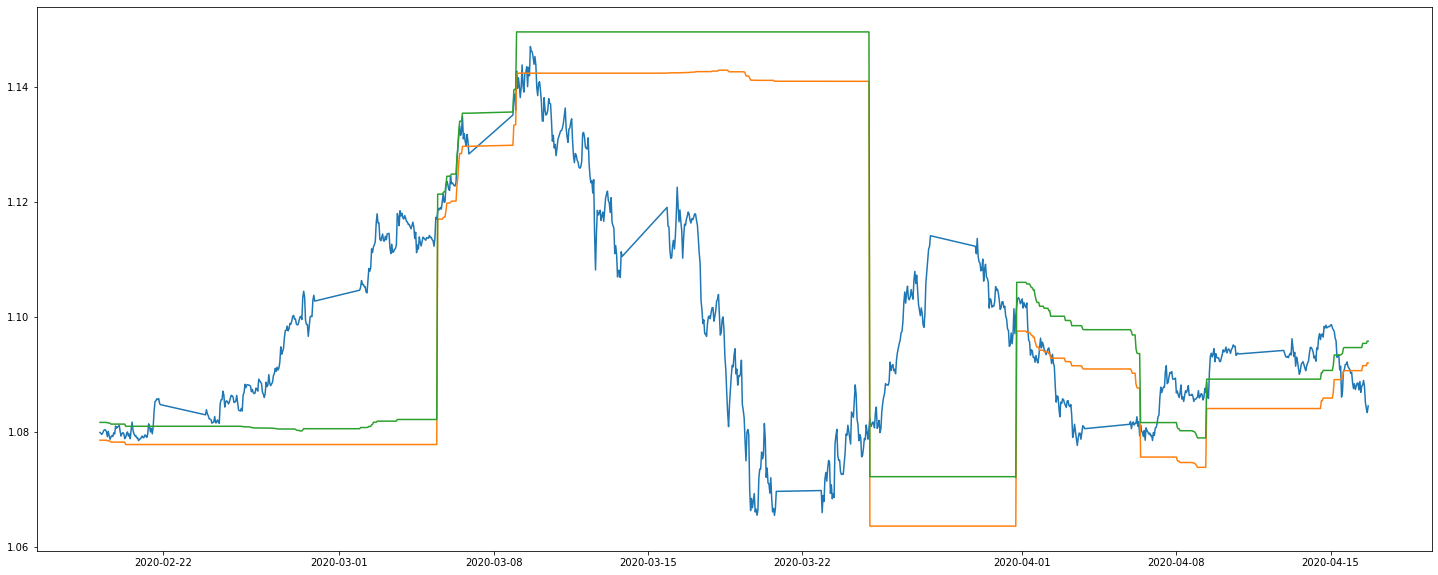

In [67]:
test(400,start,end, 100)

                             Close    Show_L    Show_H
Date                                                  
2020-04-16 08:00:00+00:00  1.08878  1.068716  1.073832
2020-04-16 09:00:00+00:00  1.08688  1.068716  1.073832
2020-04-16 10:00:00+00:00  1.08796  1.068716  1.073832
2020-04-16 11:00:00+00:00  1.08820  1.068716  1.073832
2020-04-16 12:00:00+00:00  1.08895  1.068716  1.073832
2020-04-16 13:00:00+00:00  1.08788  1.068716  1.073832
2020-04-16 14:00:00+00:00  1.08508  1.068716  1.073832
2020-04-16 15:00:00+00:00  1.08408  1.084064  1.089180
2020-04-16 16:00:00+00:00  1.08336  1.084064  1.089180
2020-04-16 17:00:00+00:00  1.08452  1.084064  1.089180


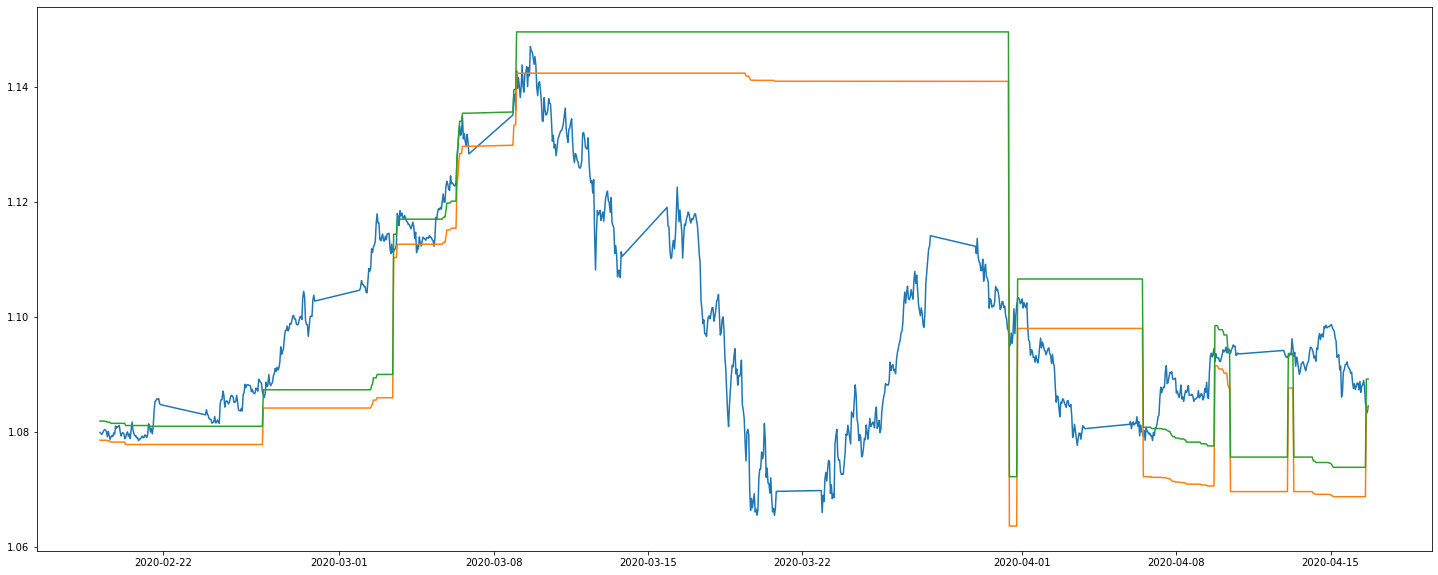

In [51]:
test(500,start,end)

                             Close    Show_L    Show_H
Date                                                  
2020-04-16 08:00:00+00:00  1.08878  1.076910  1.083565
2020-04-16 09:00:00+00:00  1.08688  1.076910  1.083565
2020-04-16 10:00:00+00:00  1.08796  1.083565  1.090220
2020-04-16 11:00:00+00:00  1.08820  1.083565  1.090220
2020-04-16 12:00:00+00:00  1.08895  1.082128  1.088304
2020-04-16 13:00:00+00:00  1.08788  1.081690  1.087720
2020-04-16 14:00:00+00:00  1.08508  1.081621  1.087628
2020-04-16 15:00:00+00:00  1.08408  1.081621  1.087628
2020-04-16 16:00:00+00:00  1.08336  1.081621  1.087628
2020-04-16 17:00:00+00:00  1.08452  1.081621  1.087628


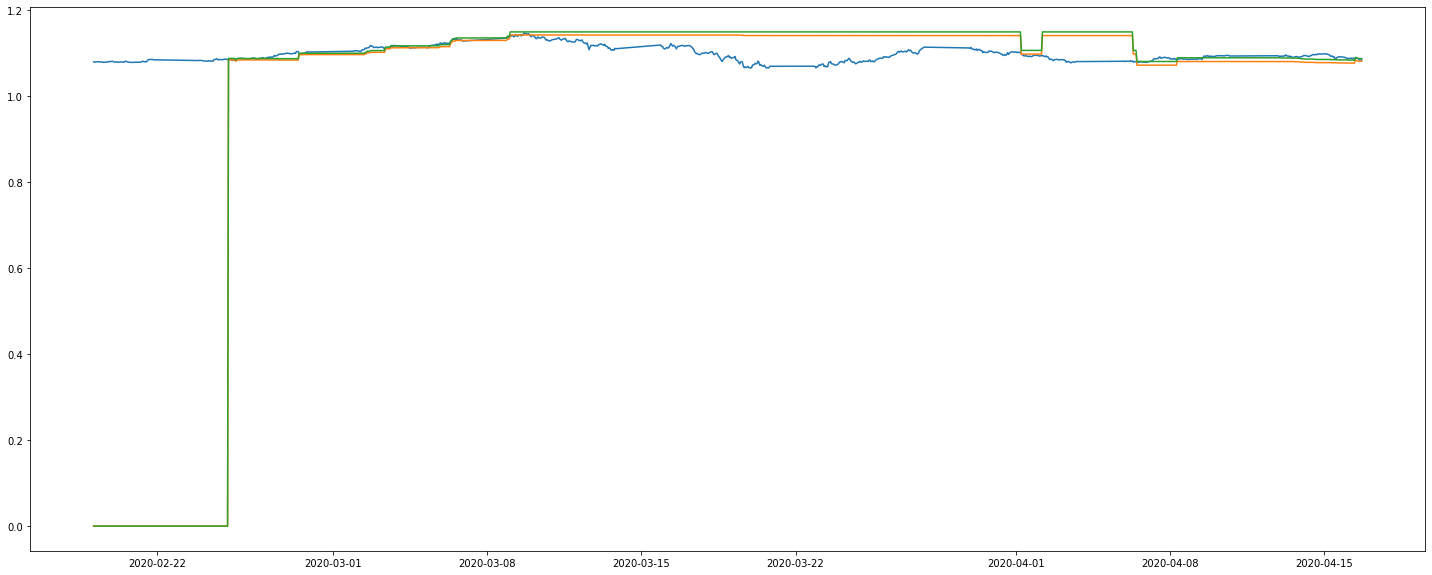

In [52]:
test(600,start,end)